In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate

df = pd.read_csv("/Users/mayvic/Documents/git/java-migration-paper/data/10k_repo_features.csv")


def trim_data(data, thresh=0.95):
    p = np.percentile(data, 95)
    return data[data <= p]

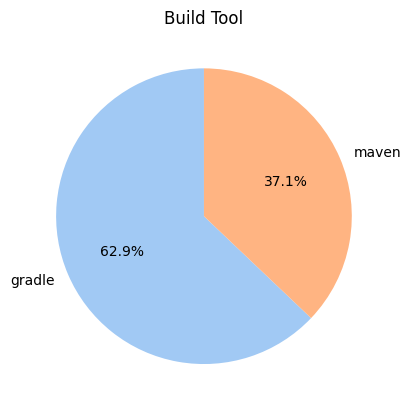

In [3]:
counts = df["build_tool"].value_counts()

# Define a color palette with Seaborn
colors = sns.color_palette("pastel")[:2]  # Using the first two pastel colors

# Plot a pie chart with Seaborn colors
plt.pie(counts, labels=counts.keys(), autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Build Tool")
plt.show()

Text(0.5, 1.0, 'Number of Java Files (removed top 5%)')

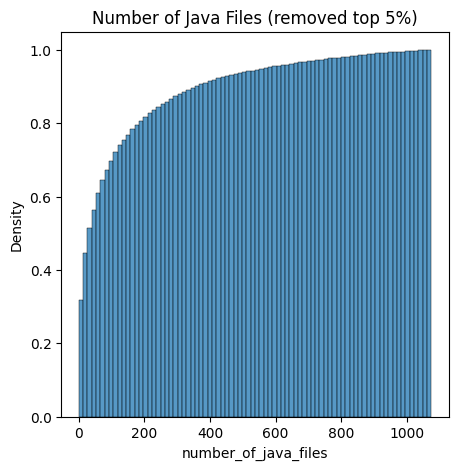

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))

sns.histplot(
    data=trim_data(df.number_of_java_files, 0.95),
    ax=axes,
    stat="density",
    cumulative=True,
)
axes.set_title("Number of Java Files (removed top 5%)")

Text(0.5, 1.0, 'Number of External Dependencies (removed top 5%)')

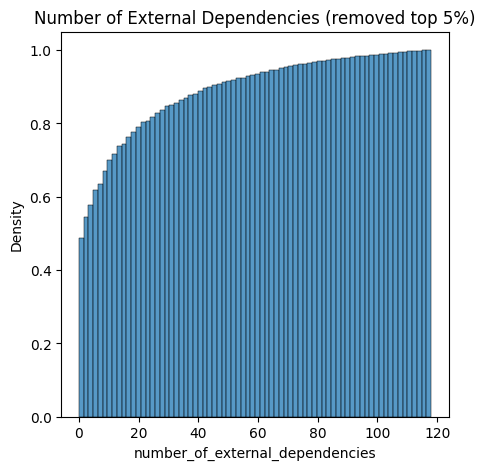

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns.histplot(data=trim_data(df.number_of_external_dependencies, 0.95), ax=axes, stat="density", cumulative=True)
axes.set_title("Number of External Dependencies (removed top 5%)")

Text(0.5, 1.0, 'Number of Unit Tests (removed top 5%)')

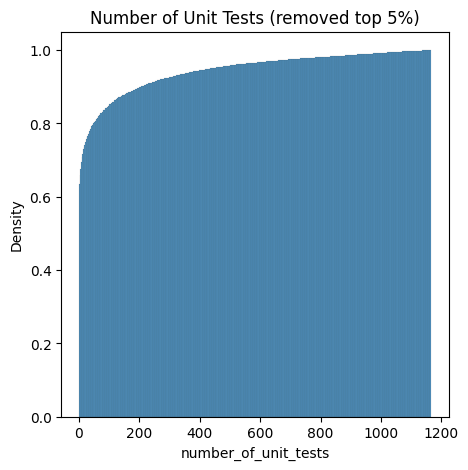

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns.histplot(data=trim_data(df.number_of_unit_tests, 0.95), ax=axes, stat="density", cumulative=True)
axes.set_title("Number of Unit Tests (removed top 5%)")

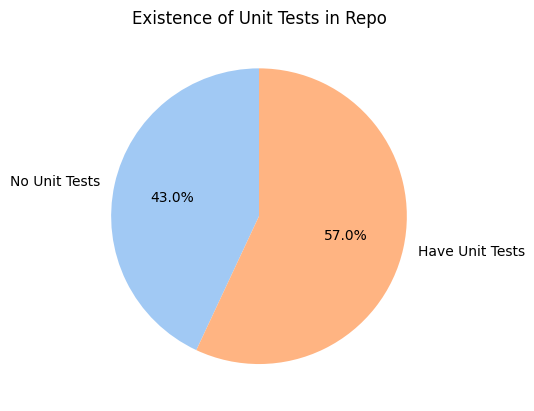

In [7]:
data = [len(df[df.number_of_unit_tests == 0]), len(df[df.number_of_unit_tests > 0])]

# Plot a pie chart with Seaborn colors
plt.pie(data, labels=["No Unit Tests", "Have Unit Tests"], autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Existence of Unit Tests in Repo")
plt.show()

In [8]:
cols = [
    "number_of_external_dependencies",
    "number_of_java_files",
    "number_of_lines_of_code",
    "number_of_modules",
    "number_of_unit_tests",
]

stats = []
for col in cols:
    stats.append(
        [
            col,
            f"{df[col].mean():.2f}",
            f"{df[col].median():.2f}",
            f"{df[col].std():.2f}",
            f"{df[col].min():.2f}",
            f"{df[col].max():.2f}",
        ]
    )

headers = ["Column", "Mean", "Median", "Std", "Min", "Max"]
print(tabulate(stats, headers=headers, tablefmt="simple"))

Column                               Mean    Median        Std    Min              Max
-------------------------------  --------  --------  ---------  -----  ---------------
number_of_external_dependencies     27.74       3       100.72      0   3394
number_of_java_files               275.36      42      1320.84      0  60391
number_of_lines_of_code          43982.2     4581.5  466747         0      3.78248e+07
number_of_modules                    4.64       2        13.46      1    583
number_of_unit_tests               280.13       1      1547.96      0  61422
